In [1]:
import pandas as pd
import numpy as np

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

In [32]:
X = make_blobs(1000,2, centers=4, random_state=14)[0]

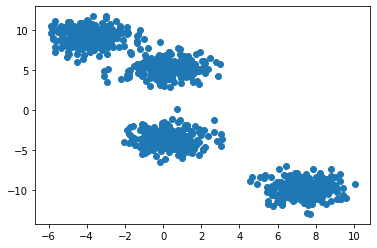

In [33]:
plt.scatter(X[:,0],X[:,1])

In [36]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [49]:
test = np.random.normal(0,0.25, size=(1000,2))

In [51]:
%%timeit
(X - test)**2

2.18 µs ± 13.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [53]:
%%timeit
np.power((X-test),2)

19 µs ± 41.7 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [61]:
%%timeit
np.sqrt(((X-test)**2).sum(axis=1))

9.8 µs ± 77.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [62]:
%%timeit
(((X-test)**2).sum(axis=1))**0.5

9.75 µs ± 52.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [64]:
def euclidean_dis(point1, point2):
    return (((point1-point2)**2).sum(axis=1))**0.5

In [66]:
euclidean_dis(X[:1], np.zeros((1,2)))

array([0.55409196])

In [67]:
## to implement a better centeroid selection method later

In [69]:
num_of_centers = 4
centers = X[np.random.choice(X.shape[0], num_of_centers)]
centers

array([[-0.22833246,  0.82241035],
       [-0.95111435,  0.43950094],
       [ 1.70057919, -1.14908352],
       [ 1.73897964, -1.36321123]])

In [77]:
distance_matrix = np.zeros((X.shape[0],num_of_centers))

In [80]:
for i,cluster in enumerate(range(num_of_centers)):
    distance_matrix[cluster,:] = euclidean_dis(x,cluster)

NameError: name 'x' is not defined

In [78]:
distance_matrix

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
def Kmeans(X, num_of_centers, epochs = 1500):
    
    centers = np.random.choice(X.shape[0], num_of_centers)